In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator
import plotly.offline as pyo
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from colorama import Fore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from plotly.offline import plot, iplot, init_notebook_mode

import plotly.io as pio
pio.renderers.default = "svg"
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train_df = pd.read_csv("train.csv",index_col="id")
print(train_df.shape)
train_df.head()

(15304, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [3]:
train_df2= pd.read_csv("healthcare-dataset-stroke-data.csv",index_col="id")
print(train_df2.shape)
train_df2.head()

(5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
Merged_df = pd.concat([train_df, train_df2])
print(Merged_df.shape)
Merged_df.head()

(20414, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [5]:
print('-----Missing Values-----')
print(Merged_df.isnull().sum())
print('-----------DataTypes-----------')
print(Merged_df.dtypes)

-----Missing Values-----
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
-----------DataTypes-----------
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [6]:
Merged_df['bmi'] = Merged_df['bmi'].fillna(np.round(Merged_df.bmi.mean()))

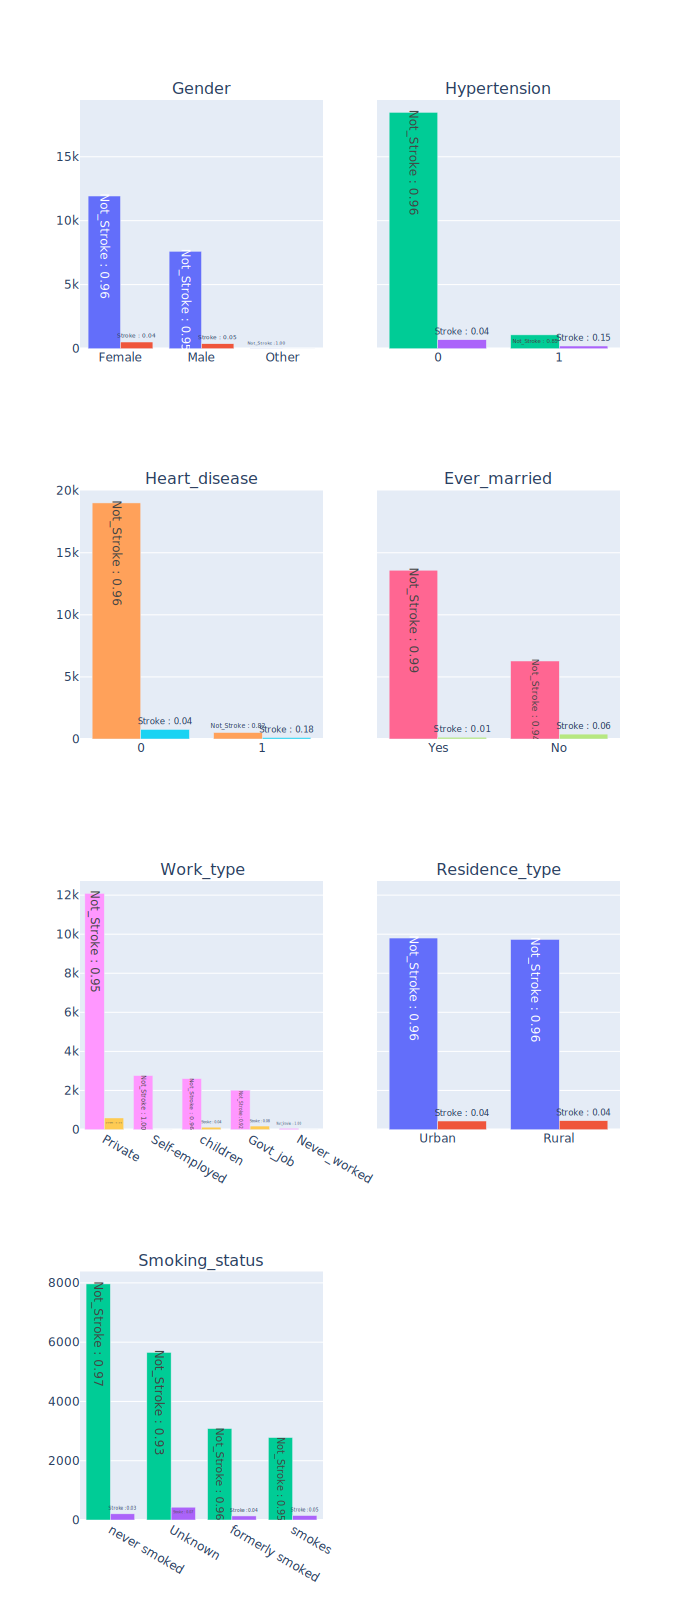

In [7]:
def make_bar(feature, rows, cols):
    tmp2 = Merged_df.groupby(feature)['stroke'].mean()
    tmp = 1 - Merged_df.groupby(feature)['stroke'].mean().values
    fig.add_trace(go.Bar(x = Merged_df[feature].value_counts().index, y= Merged_df[feature].value_counts().values*tmp,
                     text=tmp,texttemplate='Not_Stroke : %{text:.2f}',textposition='auto'),rows,cols)
    fig.add_trace(go.Bar(x = Merged_df[feature].value_counts().index, y= Merged_df[feature].value_counts().values * Merged_df.groupby(feature)['stroke'].mean().values,
                     text=tmp2,texttemplate='Stroke : %{text:.2f}', textposition='auto'),rows,cols)

fig = make_subplots(rows=4, cols=2, shared_yaxes=True,subplot_titles=("Gender", "Hypertension",
                                                                     "Heart_disease","Ever_married",
                                                                     "Work_type","Residence_type",
                                                                     "Smoking_status"),vertical_spacing=0.1)
make_bar('gender',1,1)
make_bar('hypertension',1,2)
make_bar('heart_disease',2,1)
make_bar('ever_married',2,2)
make_bar('work_type',3,1)
make_bar('Residence_type',3,2)
make_bar('smoking_status',4,1)

fig.update_layout(font_family="Rockwell",height=1600, showlegend=False)
fig.show()

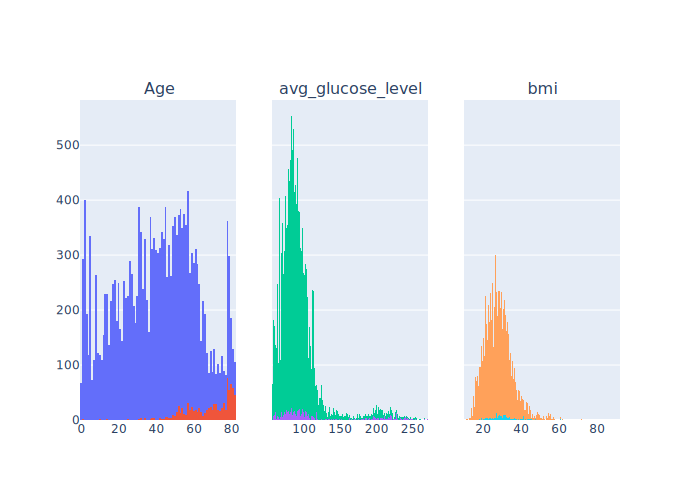

In [8]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True,subplot_titles=("Age", "avg_glucose_level","bmi"))

tmp = Merged_df['age']
fig.add_trace(go.Histogram(x = Merged_df[Merged_df['stroke'] ==0]['age'], nbinsx=100,),1,1)
fig.add_trace(go.Histogram(x = Merged_df[Merged_df['stroke'] ==1]['age'], nbinsx=100),1,1)

fig.add_trace(go.Histogram(x = Merged_df[Merged_df['stroke'] ==0]['avg_glucose_level'], nbinsx=400),1,2)
fig.add_trace(go.Histogram(x = Merged_df[Merged_df['stroke'] ==1]['avg_glucose_level'], nbinsx=400),1,2)

fig.add_trace(go.Histogram(x = Merged_df[Merged_df['stroke'] ==0]['bmi'], nbinsx=460),1,3)
fig.add_trace(go.Histogram(x = Merged_df[Merged_df['stroke'] ==1]['bmi'], nbinsx=460),1,3)


fig.update_layout(font_family="Rockwell", showlegend=False)
fig.update_layout(barmode="overlay")
fig.show()

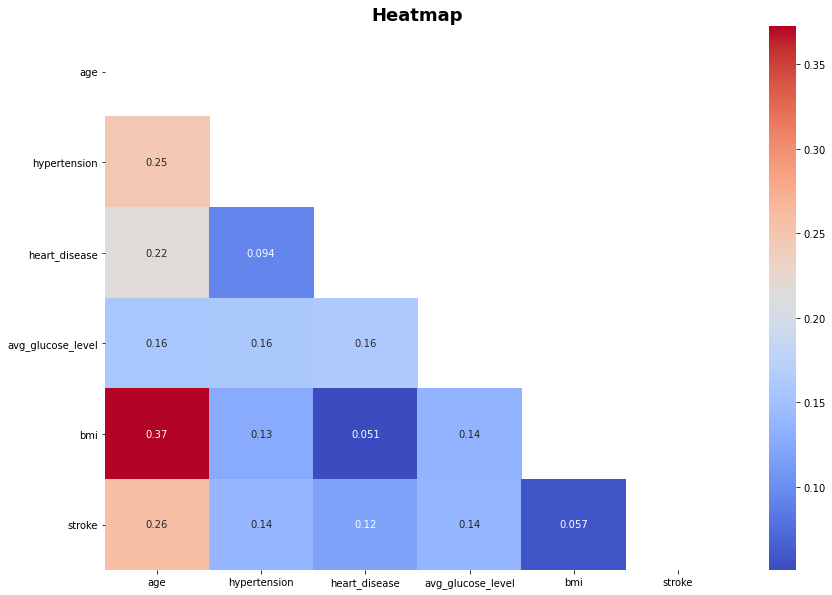

In [9]:
ig, ax = plt.subplots(1, 1, figsize=(14, 10))
mask = np.triu(np.ones_like(Merged_df.corr(), dtype=bool))
ax = sns.heatmap(Merged_df.corr(),cmap='coolwarm',annot=True,mask=mask)
ax.set_title('Heatmap', fontsize=18, fontweight='bold')
plt.show()

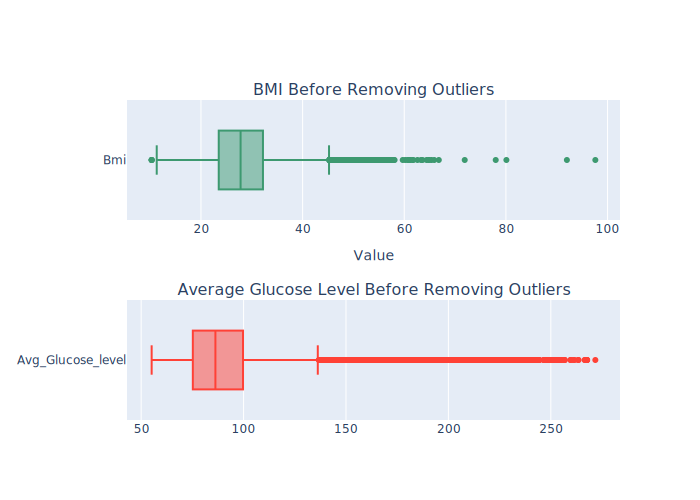

In [10]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('BMI Before Removing Outliers', 'Average Glucose Level Before Removing Outliers'))

fig.add_trace(go.Box(
    x=Merged_df['bmi'],
    name='Bmi',
    marker_color='#3D9970'
), row=1, col=1)

fig.add_trace(go.Box(
    x=Merged_df['avg_glucose_level'],
    name='Avg_Glucose_level',
    marker_color='#FF4136'
), row=2, col=1)

fig.update_layout(
    xaxis=dict(title='Value', zeroline=False),
    showlegend=False  
)

fig.show()

In [11]:
def find_outliers(df, col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    upper = q3 + IQR*1.5
    lower = q1 - IQR*1.5
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [12]:
Merged_df = find_outliers(Merged_df,"avg_glucose_level")
Merged_df = find_outliers(Merged_df,'bmi')

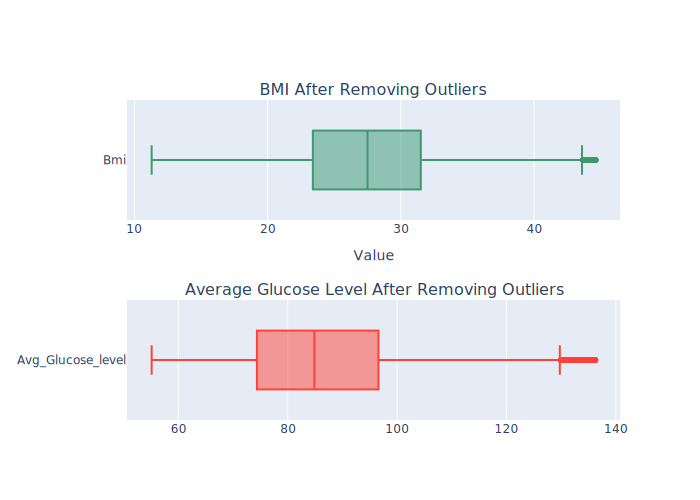

In [13]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('BMI After Removing Outliers', 'Average Glucose Level After Removing Outliers'))

fig.add_trace(go.Box(
    x=Merged_df['bmi'],
    name='Bmi',
    marker_color='#3D9970'
), row=1, col=1)

fig.add_trace(go.Box(
    x=Merged_df['avg_glucose_level'],
    name='Avg_Glucose_level',
    marker_color='#FF4136'
), row=2, col=1)

fig.update_layout(
    xaxis=dict(title='Value', zeroline=False),
    showlegend=False  
)

In [14]:
# under 18 and married invalid entry
Merged_df = Merged_df.drop(Merged_df[(Merged_df['age'] < 18) & (Merged_df['ever_married'] == 'Yes')].index)
# under 18 and working -it is illegal in most countries to work when you are under 18-
Merged_df = Merged_df.drop(Merged_df[(Merged_df['age'] < 18) & (Merged_df['work_type'] != 'children')].index)

In [15]:
tr = Merged_df.copy()
data = tr.drop(columns=['stroke'])
target = tr['stroke']

features = train_df.columns 
num_features = ['age', 'avg_glucose_level', 'bmi']
cat_features = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension','heart_disease']
target_feature = 'Stroke' 

In [16]:
vot_model_list = []
num_pipline = Pipeline([
    ('scaler',StandardScaler()),
])

cat_pipline = Pipeline([
    ('ohe',OneHotEncoder(drop='first'))
])

full_pipline = ColumnTransformer([
    ('num_pip',num_pipline,num_features),
    ('cat_pip',cat_pipline,cat_features)
])

tr = train_df.copy()

Y = target
X = data

mse_train_score = []
mse_val_score = []
lg_train_score = []
lg_val_score = []
lg_model_list = []

split = StratifiedKFold(shuffle=True,random_state=42)

Fold = 0

for train_index,eval_index in (split.split(X,Y)):
    Fold = Fold+1
    x_train, y_train = X.iloc[train_index], Y.iloc[train_index]
    x_eval, y_eval = X.iloc[train_index], Y.iloc[train_index]
    
    model = LogisticRegression()
    x_train = full_pipline.fit_transform(x_train)
    x_eval = full_pipline.fit_transform(x_eval)

    print(f'Fold : {Fold}')
    model.fit(x_train, y_train)
    train_pred = roc_auc_score(y_train, model.predict_proba(x_train)[:,1])
    eval_pred = roc_auc_score(y_eval, model.predict_proba(x_eval)[:,1])
    
    mse_train = mean_squared_error(y_train, model.predict_proba(x_train)[:,1])
    mse_eval = mean_squared_error(y_eval, model.predict_proba(x_eval)[:,1])

    mse_train_score.append(mse_train)
    mse_val_score.append(mse_eval)

    lg_train_score.append(train_pred)
    lg_val_score.append(eval_pred)
    lg_model_list.append([full_pipline,model])
    print(f'Val roc AUC score: {eval_pred}')
    print(f'Val MSE: {mse_eval}')

print()
print(f'Mean Val roc scores : {Fore.GREEN}{np.mean(lg_val_score)}')
print(f'Variance of Val roc scores: {Fore.BLUE}{np.var(lg_val_score)}')

vot_model_list.append([full_pipline,model])

Fold : 1
Val roc AUC score: 0.8693100445919995
Val MSE: 0.03188916065705139
Fold : 2
Val roc AUC score: 0.8634284108655593
Val MSE: 0.03221131986970991
Fold : 3
Val roc AUC score: 0.8588436859409182
Val MSE: 0.03229638166045657
Fold : 4
Val roc AUC score: 0.8673868857990151
Val MSE: 0.032114281021596754
Fold : 5
Val roc AUC score: 0.8658643850084052
Val MSE: 0.032192114315226984

Mean Val roc scores : 0.8649666824411794
Variance of Val roc scores: 1.307708290964619e-05


In [17]:
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv("sample_submission.csv")
test_data = full_pipline.transform(test_df)
submission_df.stroke = vot_model_list[0][1].predict_proba(test_data)[0:,1]
submission_df.to_csv('submission_1.csv',index=False)

In [18]:
def score_fnc(data_arr1, data_arr2):
    auc = roc_auc_score(data_arr1, data_arr2)
    return auc

def BootStrap(data_arr1, data_arr2, n_bootstraps):

    # initialization by bootstraping
    n_bootstraps = n_bootstraps
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(data_arr2), len(data_arr2))

        if len(np.unique(data_arr1[indices])) < 2:
            # We need at least one sample from each class
            # otherwise reject the sample
            continue
        else:
            score = score_fnc(data_arr1[indices], data_arr2[indices])
            bootstrapped_scores.append(score)

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    if len(sorted_scores)==0:
        return 0., 0.
    # Computing the lower and upper bound of the 95% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]

    return sorted_scores, confidence_lower, confidence_upper

In [19]:
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import  cross_val_predict
y_scores = cross_val_predict(model,x_train,y_train,cv=3, method='predict_proba')
fpr, tpr, th = roc_curve(y_train.values,y_scores[:,1])
auroc = auc(fpr, tpr)
print('auroc={:.4f}'.format(auroc))

auroc=0.8628


In [20]:
sorted_scores, auroc_lower, auroc_upper = BootStrap(y_train.values,y_scores[:,1],n_bootstraps=1000)
auroc_text = 'AUROC = {:.4f} ({:.4f} - {:.4f})'.format(auroc, auroc_lower, auroc_upper)
print(auroc_text)

AUROC = 0.8628 (0.8504 - 0.8753)


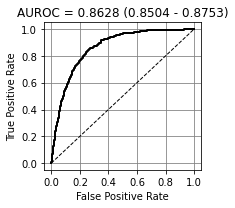

In [21]:
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(fpr, tpr, lw=2, alpha=1., color='k')
ax.plot([0, 1], [0, 1], 'k--', lw=1)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim((-0.05,1.05))
ax.set_xticks(np.arange(0,1.05,0.2))
# ax.set_xticklabels('')
ax.set_ylim((-0.05,1.05))
ax.set_yticks(np.arange(0,1.05,0.2))
# ax.set_yticklabels('')
ax.set_axisbelow(True)
ax.grid(color='gray') #, linestyle='dashed')
ax.set_title(auroc_text)
# ax.legend(framealpha=1.)

fig.tight_layout()
plt.show()

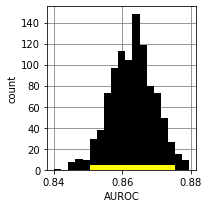

In [22]:
fig2, ax2 = plt.subplots(figsize=(3,3))
ax2.hist(sorted_scores, bins=19, color='k')
ax2.hlines(0,auroc_lower, auroc_upper, 'yellow', lw=10)

ax2.set_xlabel('AUROC')
ax2.set_ylabel('count')
# ax.set_xlim((-0.05,1.05))
# ax.set_xticks(np.arange(0,1.05,0.2))
# # ax.set_xticklabels('')
# ax.set_ylim((-0.05,1.05))
# ax.set_yticks(np.arange(0,1.05,0.2))
# # ax.set_yticklabels('')
ax2.set_axisbelow(True)
ax2.grid(color='gray') #, linestyle='dashed')
# ax.set_title(auroc_text)
# # ax.legend(framealpha=1.)

fig2.tight_layout()

plt.show()

In [23]:
def generate_features(df):
    df['age_glucose_bmi_ratio'] = (df.age * df.avg_glucose_level) / df.bmi
    df['Health indicator'] = df.hypertension * df.heart_disease
    return df

In [24]:
tr = Merged_df.copy()
tr = generate_features(tr)
data = tr.drop(columns=['stroke'])
target = tr['stroke']

features = train_df.columns
num_features = ['age', 'avg_glucose_level', 'bmi','age_glucose_bmi_ratio'] 
cat_features = ['gender','smoking_status','Health indicator']
target_feature = 'Stroke' 

In [25]:
vot_model_list = []
num_pipline = Pipeline([
    ('scaler',StandardScaler()),
])

cat_pipline = Pipeline([
    ('ohe',OneHotEncoder(drop='first'))
])

full_pipline = ColumnTransformer([
    ('num_pip',num_pipline,num_features),
    ('cat_pip',cat_pipline,cat_features)
])

tr = train_df.copy()

Y = target
X = data

mse_train_score = []
lg_train_score = []
lg_val_score = []
lg_model_list = []

split = StratifiedKFold(shuffle=True,random_state=42)

Fold = 0

for train_index,eval_index in (split.split(X,Y)):
    Fold = Fold+1
    x_train, y_train = X.iloc[train_index], Y.iloc[train_index]
    x_eval, y_eval = X.iloc[train_index], Y.iloc[train_index]
    
    model = LogisticRegression()
    x_train = full_pipline.fit_transform(x_train)
    x_eval = full_pipline.fit_transform(x_eval)

    print(f'Fold : {Fold}')
    model.fit(x_train, y_train)
    train_pred = roc_auc_score(y_train, model.predict_proba(x_train)[:,1])
    eval_pred = roc_auc_score(y_eval, model.predict_proba(x_eval)[:,1])
    
    mse_train = mean_squared_error(y_train, model.predict_proba(x_train)[:,1])
    mse_eval = mean_squared_error(y_eval, model.predict_proba(x_eval)[:,1])

    mse_train_score.append(mse_train)
    mse_val_score.append(mse_eval)

    lg_train_score.append(train_pred)
    lg_val_score.append(eval_pred)
    lg_model_list.append([full_pipline,model])
    print(f'Val roc AUC score: {eval_pred}')
    print(f'Val MSE: {mse_eval}')

print()
print(f'Mean Val roc scores : {Fore.GREEN}{np.mean(lg_val_score)}')
print(f'Variance of Val roc scores: {Fore.BLUE}{np.var(lg_val_score)}')

vot_model_list.append([full_pipline,model])

Fold : 1
Val roc AUC score: 0.8673010312577981
Val MSE: 0.032067170675070734
Fold : 2
Val roc AUC score: 0.8598752761710928
Val MSE: 0.03239607176353685
Fold : 3
Val roc AUC score: 0.8553805289140894
Val MSE: 0.03249772088284041
Fold : 4
Val roc AUC score: 0.8628589817375848
Val MSE: 0.032333382528237704
Fold : 5
Val roc AUC score: 0.8612514530681367
Val MSE: 0.03246392292114947

Mean Val roc scores : 0.8613334542297404
Variance of Val roc scores: 1.5101907403587138e-05


In [26]:
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv("sample_submission.csv")
test_df = generate_features(test_df)
test_data = full_pipline.transform(test_df)
submission_df.stroke = vot_model_list[0][1].predict_proba(test_data)[0:,1]
submission_df.to_csv('submission_FE.csv',index=False)